In [180]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [137]:
# build dataset: read from different folders, place photo arrays in the features array
rootdir = '../dataset/CroppedYale/'
# list of corrupted images as reported from source
corrupted = ['yaleB11_P00A+050E-40', 'yaleB11_P00A+095E+00', 'yaleB11_P00A-050E-40', 'yaleB11_P00A-110E+15',\
'yaleB12_P00A+050E-40', 'yaleB12_P00A+095E+00', 'yaleB12_P00A-050E-40', 'yaleB12_P00A-110E+15',\
'yaleB12_P00A-110E-20', 'yaleB13_P00A+050E-40', 'yaleB13_P00A+095E+00', 'yaleB13_P00A-050E-40',\
'yaleB13_P00A-110E+15', 'yaleB15_P00A-035E+40', 'yaleB16_P00A+095E+00', 'yaleB16_P00A-010E+00',\
'yaleB17_P00A-010E+00', 'yaleB18_P00A-010E+00']

# check for corrupted files
# append list of files to read (filename not containing 'Ambient')
files_2read = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filename, file_extension = os.path.splitext(file)
        if filename in corrupted:
            print(os.path.join(subdir, file))
        elif (file_extension == '.pgm') & ('Ambient' not in filename):
            files_2read.append(os.path.join(subdir, file))


Pixel array shape: (192, 168)


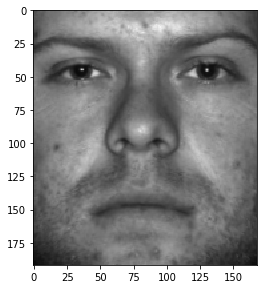

In [132]:
# show one image plot before loading dataset
# cv2.imread() in grayscale mode
img = cv2.imread(files_2read[0],0)
print(f"Pixel array shape: {img.shape}")

# trick to using plotly (avoid cv2 imshow in windows os)
plt_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,8))
imgplot = plt.imshow(plt_image)


In [159]:
# now load all images into a list of arrays using reshape
images_list = [cv2.imread(file,0).reshape(-1) for file in files_2read]

# and transform the list of arrays into my matrix of features
X = np.stack(images_list)

# shape of X --> rows: numbers of photos, columns: reshape of pixels
print(f"My features matrix has {X.shape[0]} entries with {X.shape[1]} features.")
print('Much higher number of features w.r.t data entries: high dimensionality')

My features matrix has 2414 entries with 32256 features.
Much higher number of features w.r.t data entries: high dimensionality


In [183]:
# data cleaning: obtain target vector
# target vector: list of labels
labels_list = [file.split('\\')[0].split('/')[-1] for file in files_2read]

In [187]:
# Encode target labels with values between 0 and n_classes-1
le = LabelEncoder()
y = le.fit_transform(labels_list)

In [191]:
# save numpy arrays to compressed binary format for posterior machine learning
# save to npz file
np.savez_compressed('../dataset/X.npz', X)
np.savez_compressed('../dataset/y.npz', y)